## Homework 3

A microstrip patch antenna with a width W = 40mm centered about the y-axis and a resonant length L = 60mm about the x-axis resides on a lossy dielectric substrate with a height h = 1.57mm, a dielectric constant eps-r = 2.2, and loss tangent tand = 0.002. Use this information to answer the following questions.

In [13]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
from numpy.linalg import inv
import numpy as np

import sys

sys.path.append("..")
from pySmithPlot.smithplot import SmithAxes

W = 0.04 #40mm
L = 0.06 #60mm
h = 0.00157 #1.57mm
eps_r = 2.2
tand = 0.002
mu = 4*np.pi*10**-7
eps_o = 8.85*10**-12
c = 3*10**8

### Problem 1

Calculate the resonant frequency f<sub>o</sub> corresponding to the fundamental patch mode.

In [14]:
#Effective Epsilon (Balanis 14.1 - 14.5)
#Assume W/h > 1

e_reff = ((eps_r + 1)/2)+((eps_r - 1)/2)*(1+(12*h/W))**(-1/2)

delta_L = h*0.412*((e_reff+0.3)*((W/h)+0.264))/((e_reff-0.258)*((W/h)+0.8))

L_eff = L + 2*delta_L

#Resonant Frequency Balanis Eq 14-31, but have L, W, h (Rather than h, L, W because of orientation)
m = 0
n = 1
fo = (c/(2*np.pi*np.sqrt(eps_r)))*np.sqrt((m*np.pi/L)**2+(n*np.pi/W)**2)

#print(fo)
print('fo = ', fo/(10**9),'GHz')

fo =  2.52824948424 GHz


### Problem 2

Determine the modal index or indices (m,n) of the patch modes corresponding to the first five unique resonant frequencies.

In [15]:
f = np.zeros((5,5))
for m in range(5):
    for n in range(5):
        f[m,n] = (c/(2*np.pi*np.sqrt(eps_r)))*np.sqrt((m*np.pi/L)**2+(n*np.pi/W)**2)

fmode = np.zeros(5)
f[np.where(f == np.amin(f))] = 10e10
m = np.zeros(5)
n = np.zeros(5)
k0 = np.zeros(5)

for i in range(5):
    fmode[i] = np.amin(f)
    m[i] = np.where(f == np.amin(f))[0]
    n[i] = np.where(f == np.amin(f))[1]
    f[np.where(f == np.amin(f))] = 10e10

    print('f',int(m[i]),int(n[i]),'=',fmode[i]/(10**9),'GHz')
k0 = (2*np.pi*fmode[1])/c
k = np.sqrt(eps_r)*k0
print(k)

f 1 0 = 1.68549965616 GHz
f 0 1 = 2.52824948424 GHz
f 1 1 = 3.03857771753 GHz
f 2 0 = 3.37099931232 GHz
f 2 1 = 4.2137491404 GHz
78.5398163397


### Problem 3

Calculate the modal excitation coefficients A<sub>mn</sub> at the frequency f = f<sub>o</sub> for the first five patch modes using a coaxial probe excitation at a feed location (x<sub>o</sub>, y<sub>o</sub>) = (25mm, 0mm)

In [16]:
def epsm(l):
    if l == 0:
        return 1
    else:
        return 2

def phi_a(x,y,u,v):
    return np.sqrt((epsm(u)*epsm(v))/(L*W))*np.cos(u*np.pi*x/L)*np.cos(v*np.pi*y/W)

def sincfun(x):
    if isinstance(x,float):
        if x == 0:
            sinc = 1
        else:
            sinc = np.sin(x) / x
    else:
        for i in range(len(x)):
            if x[i] == 0:
                sinc = 1
            else:
                sinc = np.sin(x[i])/x[i]

for i in range(5):
        # Harrington Paper equation for alpha t=h, d=L
    W_feed = W / 2

    e0n = 1

    #equations for rest
    x = m * np.pi * W / (2 * L)

    if isinstance(x,float):
        if x == 0:
            Jo = 1
        else:
            Jo = np.sin(x) / x
    else:
        for i in range(len(x)):
            if x[i] == 0:
                Jo = 1
            else:
                Jo = np.sin(x[i])/x[i]

    alpha = (u*h*c**2/eps_r)* (phi_a(L_feed,W_feed,m[i],n[i]))**2 * Jo**2


### Problem 4

Determine the feed location (+/-x<sub>o</sub>, 0mm) for a coaxial probe excitation that provides an impedance match to a 50ohm coaxial feed line for the fundamental patch mode. Use this feed location for the remaining questions (Where relevant).

### Problem 5

Calculate the modal excitation coefficients A<sub>mn</sub> at the frequency f = f<sub>o</sub> for the first five patch modes.

In [17]:
E0 = -1j*alpha*2*np.pi*fmode

theta = np.linspace(-np.pi,np.pi,40)
phi = np.linspace(0, np.pi,40)
phi1 = np.linspace(0, np.pi/2, 20)
phi2 = np.linspace(3*np.pi/2, 2*np.pi, 20)
E_phi1 = np.zeros(np.size(phi1))
E_phi2 = np.zeros(np.size(phi2))

E_theta = np.zeros(np.size(theta))
E_phi = np.zeros(np.size(phi))

#Balanis eq. 14-45
for i in range(np.size(phi1)):
    k0 = 35.2769749216
    E_phi1[i] += ((np.sin(k0*h*np.cos(phi1[i])/2)/(k0*h*np.cos \
    (phi1[i])/2))*np.cos(k0*Leff*np.sin(phi1[i])/2))
    E_phi2[i] += ((np.sin(k0*h*np.cos(phi2[i])/2)/(k0*h*np.cos \
    (phi2[i])/2))*np.cos(k0*Leff*np.sin(phi2[i])/2))
#print(E_phi1)
#print(E_phi2)

E_phi = np.concatenate((E_phi1, E_phi2))
#print(E_phi)

phi = np.concatenate((phi1, phi2))

#Normalization and dB Conversion
E_phi_norm = E_phi/np.max(E_phi)
#E_phi_dB = 10*np.log10([E_phi])

for i in range(np.size(theta)):
    E_theta[i] += np.sin(theta[i])*(np.sin(k0*h*np.sin(theta[i])/2)*np.sin(k0*W*np.cos(theta[i])/2)) \
    / ((k0*h*np.sin(theta[i])/2)*(k0*W*np.cos(theta[i])/2))

#print(E_theta)
E_theta_norm = E_theta/np.max(E_theta)

### Problem 6

Plot normalized radiation pattern of the fundamental patch mode at the frequency f = f<sub>o</sub> in the xz- and yz-planes using the equivalent magnetic currents given by the cavity model. Include both polarizations and plot over a 30-dB dynamic range. 

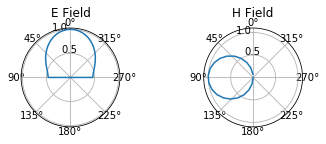

In [18]:
#### PLOTS #####
plt.figure(1)
ax = plt.subplot(221, polar=True)
#ax = plt.subplot(polar=True)
plt.polar(phi, E_phi)
plt.title('E Field')
ax.set_theta_zero_location("N")

ax = plt.subplot(222, polar=True)
#ax = plt.subplot(polar=True)
plt.polar(theta, E_theta_norm)
plt.title('H Field')
ax.set_theta_zero_location("N")

plt.show()

### Problem 7

Plot the input impedance Z<sub>in</sub> on a Smith chart over the range at 0.5f<sub>o</sub> < f<sub>o</sub> < 1.5f<sub>o</sub> and calculate the 2:1 VSWR bandwidth.

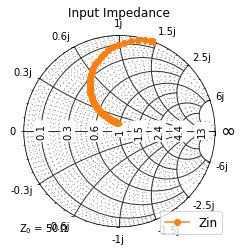

In [19]:
#input impedance
#Balanis eq 14-13 & eq 14-16

f0_range = np.linspace(0.5*fmode[0],1.5*fmode[0],50)

z = np.zeros([len(f0_range)])

for i in range(len(f0_range)):
    lam = c/f0_range[i]
    G = (1/90) * (W/lam)**2
    z[i] = 1/(2*G)

#print(z)

#### SMITH CHART PLOT ###
plt.figure(2)

ax = plt.subplot(1, 1, 1, projection='smith')
plt.plot([10, 100], markevery=1)

plt.plot(z/50, markevery=1, label="Zin", datatype=SmithAxes.Z_PARAMETER)

plt.legend(loc="lower right", fontsize=12)
plt.title("Input Impedance")

plt.show()